Daniel Carvajal Patiño - 2132817

# Problema de Calendarización
## Sheduling: 
En español conocido común mente como planificador, es un componente funcional muy importante de los sistemas operativos multitarea y multiproceso, y es esencial en los sistemas operativos de tiempo real. Su función consiste en repartir el tiempo disponible de un microprocesador entre todos los procesos que están disponibles para su ejecución.
Todo sistema operativo gestiona los programas mediante el concepto de proceso. En un instante dado, en el ordenador pueden existir diversos procesos listos para ser ejecutados. Sin embargo, solamente uno de ellos puede ser ejecutado (en cada microprocesador). De ahí la necesidad de que una parte del sistema operativo gestione, de una manera equitativa, qué proceso debe ejecutarse en cada momento para hacer un uso eficiente del procesador.

Existen dos tipos de algoritmos de calendarización (políticas de planificación), expropiativos y no expropiativos. Los expropiativos asignan un tiempo de ejecución a cada proceso después del cual se calendariza otro proceso, hasta que cada proceso acabe su trabajo. También pueden expulsar a un proceso en ejecución si llega otro de mayor prioridad que necesita ejecutarse. Los no expropiativos permiten que se ejecute el proceso hasta que acabe su trabajo. Es decir, una vez les llega el turno de ejecutarse, no dejarán libre la CPU hasta que terminen o se bloqueen.
## Tarea:
Se plantea realizar la calendarización de 9 tareas en 3 máquinas, donde cada tarea tiene un tiempo de ejecución en cada máquina. Mediante el método de fuerza bruta encontrar el menor tiempo que gastarían las 3 máquinas en realizar las nueve tareas. El ejercicio se ilustra de la siguiente manera:

![maquinas](images/maquinas.png)

## Solución:



In [1]:
import numpy as np

lista = []


# Se realiza 9 bucles, uno por tarea, cada uno de ellos de 3 valores.
# De esta manera se toman todos los posibles arreglos de las nueve tareas
# en las maquinas.

for tarea_uno in [1,10,19]:
    for tarea_dos in [2,11,20]:
        for tarea_tres in [3,12,21]:
            for tarea_cuatro in [4,13,22]:
                for tarea_cinco in [5,14,23]:
                    for tarea_seis in [6,15,24]:
                        for tarea_siete in [7,16,25]:
                            for tarea_ocho in [8,17,26]:
                                for tarea_nueve in [9,18,27]:
                                    lista.append([tarea_uno,tarea_dos,tarea_tres,tarea_cuatro,tarea_cinco,tarea_seis,tarea_siete,tarea_ocho,tarea_nueve])

# Se guardan los posbiles arreglos en una lista
lista_dos = np.array(lista)
lista_dos

array([[ 1,  2,  3, ...,  7,  8,  9],
       [ 1,  2,  3, ...,  7,  8, 18],
       [ 1,  2,  3, ...,  7,  8, 27],
       ..., 
       [19, 20, 21, ..., 25, 26,  9],
       [19, 20, 21, ..., 25, 26, 18],
       [19, 20, 21, ..., 25, 26, 27]])

Cada posicion de `lista_dos` representa el valor en tiempo de la tarea de dicha posicion.

In [2]:
print("Total de arreglos: ", lista_dos.shape[0])

Total de arreglos:  19683


In [3]:
Item = 689
print("Por Ejemplo para el arreglo", Item,)

Por Ejemplo para el arreglo 689


In [47]:
print("Arreglo", Item, ":",lista_dos[Item],"\nMaquina Uno:", lista_dos[Item][lista_dos[Item]<=9],"Tiempo: ",sum(lista_dos[Item][lista_dos[Item]<=9]), "\nMaquina Dos", lista_dos[Item][~np.array(lista_dos[Item]<=18) ^ np.array(lista_dos[Item]>=10)],"Tiempo:", sum(lista_dos[Item][~np.array(lista_dos[Item]<=18) ^ np.array(lista_dos[Item]>=10)]), "\nMaquina Tres:",  lista_dos[Item][lista_dos[Item]>=19], "Tiempo", sum(lista_dos[Item][lista_dos[Item]>=19]))

Arreglo 689 : [ 1  2  3 22 23 15 16 17 27] 
Maquina Uno: [1 2 3] Tiempo:  6 
Maquina Dos [15 16 17] Tiempo: 48 
Maquina Tres: [22 23 27] Tiempo 72


Entonces la tarea ahora es encontrar el tiempo que gastas las maquinas en cada uno de los posibles arreglos

In [44]:
maquinas = np.ones((19683, 3))
for j, i in enumerate(lista_dos):
    maquinas[j][0] = np.sum(i[i<=9])
    maquinas[j][1] = np.sum(i[~np.array(i<=18) ^ np.array(i>=10)])
    maquinas[j][2] = np.sum(i[i>=19]) 

In [45]:
maquinas

array([[  45.,    0.,    0.],
       [  36.,   18.,    0.],
       [  36.,    0.,   27.],
       ..., 
       [   9.,    0.,  180.],
       [   0.,   18.,  180.],
       [   0.,    0.,  207.]])

In [7]:
maquina_uno = [maquinas[i][0] for i in range(maquinas.shape[0])]
maquina_dos = [maquinas[i][1] for i in range(maquinas.shape[0])]
maquina_tres = [maquinas[i][2] for i in range(maquinas.shape[0])]

In [8]:
import pandas as pd
import matplotlib as plt
%matplotlib inline 
series = pd.DataFrame({"Maquina Uno":maquina_uno, "Maquina Dos": maquina_dos, "Maquina Tres": maquina_tres }, columns=["Maquina Uno", "Maquina Dos", "Maquina Tres"], index = range(maquinas.shape[0]))

(<matplotlib.axes._subplots.AxesSubplot at 0x20f6a83bb00>,
    Maquina Uno  Maquina Dos  Maquina Tres
 0         45.0          0.0           0.0
 1         36.0         18.0           0.0
 2         36.0          0.0          27.0
 3         37.0         17.0           0.0
 4         28.0         35.0           0.0)

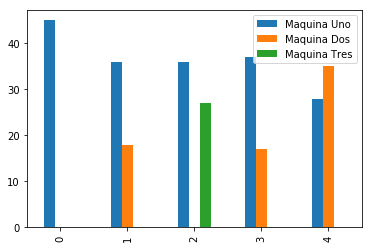

In [13]:
series.head().plot.bar(), series.head()

Teniendo el tiempo de las maquinas ahora hasy que escoger el tiempo minimo de los tiempos maximas gastados por las maquinas en cada uno de los arreglos

In [14]:
maxs = []
for i in maquinas:
    maxs.append(i.max())
min(maxs)

27.0

In [32]:
mejores = [(j,i) for i,j in enumerate(maquinas) if j.max()==27 ]

In [38]:
for i in mejores:
    print("Tiempo:", i[0], "Arreglo:", i[1])

Tiempo: [ 27.  27.  27.] Arreglo: 326
Tiempo: [ 27.  27.  27.] Arreglo: 758
Tiempo: [ 27.  27.  27.] Arreglo: 2198
Tiempo: [ 27.  27.  27.] Arreglo: 6566


In [63]:
print("Arreglo N°1:", lista_dos[mejores[0][1]],"\nArrgelo N°2:", lista_dos[mejores[1][1]], "\nArreglo N°3:" ,lista_dos[mejores[2][1]],"\nArreglo N°4:", lista_dos[mejores[3][1]])

Arreglo N°1: [ 1  2  3 13 14  6  7  8 27] 
Arrgelo N°2: [ 1  2 12  4  5 15  7  8 27] 
Arreglo N°3: [ 1 11  3  4  5  6 16  8 27] 
Arreglo N°4: [10  2  3  4  5  6  7 17 27]


(<matplotlib.axes._subplots.AxesSubplot at 0x20f6c107e10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20f6c1f2da0>)

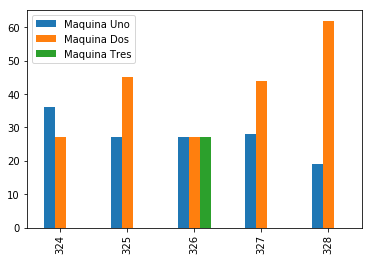

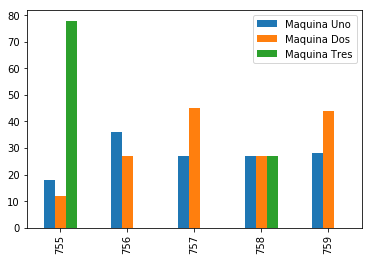

In [94]:
series[324:329].plot.bar(), series[755:760].plot.bar()